# Titanic Dataset Kaggle Competition

The necessary packages needed to build the analysis is imported into the notebook

In [0]:
# Importing packages
import pandas as pd
import numpy as np
import random as rnd

# Importing visualization packages
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Importing machine learning packages
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

The training and test data are contained in the root folder of the notebook and imported into the notebook as Pandas dataframes

In [0]:
df_train = pd.read_csv('titanic/train.csv')
df_test = pd.read_csv('titanic/test.csv')
combine = [df_train, df_test]

In [0]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [0]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [0]:
df_train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Salkjelsvik, Miss. Anna Kristine",male,347082,B96 B98,S
freq,1,577,7,4,644


The variables available to us have the following descriptors which explain to us what they mean.

- Survived: Survived (1) or died (0)
- Pclass: Passenger's class
- Name: Passenger's name
- Sex: Passenger's sex
- Age: Passenger's age
- SibSp: Number of siblings/spouses aboard
- Parch: Number of parents/children aboard
- Ticket: Ticket number
- Fare: Fare
- Cabin: Cabin
- Embarked: Port of embarkation

### Expected survival for different features

In [0]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [0]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [0]:
df_train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [0]:
df_train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


### Number of people who survived distributed over age

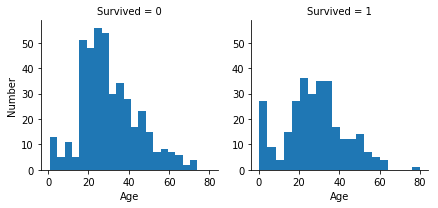

In [0]:
age_hist = sns.FacetGrid(df_train, col='Survived')
age_hist.map(plt.hist, 'Age', bins=20)
age_hist.set_ylabels('Number')

We can tell that amongst those who survived (Survived = 1), the number of infants (Age: 0-4) is higher than passengers below the age of 20

### Number of people who survived over age and passenger class

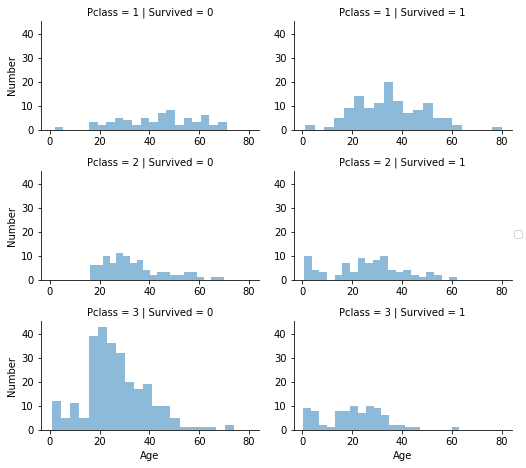

In [0]:
pclass_age_grid = sns.FacetGrid(df_train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
pclass_age_grid.map(plt.hist, 'Age', alpha=0.5, bins=20)
pclass_age_grid.add_legend()
pclass_age_grid.set_ylabels('Number')

The casualties of passenger who were in Passenger Class 3 are significantly more than the casualties in other passenger classes.

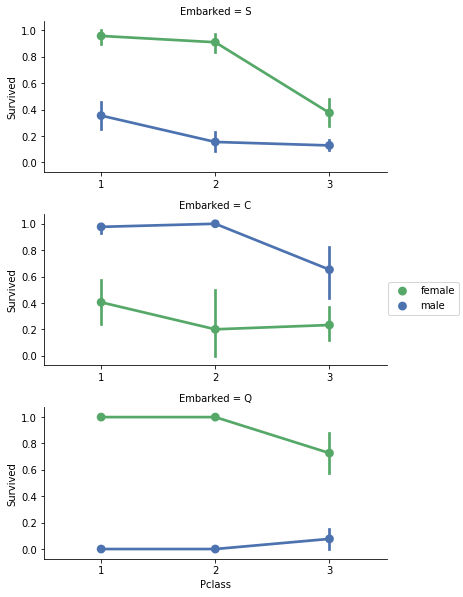

In [0]:
grid = sns.FacetGrid(df_train, row='Embarked', size=2.8, aspect=2)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

The survivors of female passengers was more amongst those passengers who embarked on S and Q but not in C

### Dropping irrelevant columns in data

In [0]:
df_train = df_train.drop(['Ticket', 'Cabin'], axis=1)
df_test = df_test.drop(['Ticket', 'Cabin'], axis=1)
combine = [df_train, df_test]

### Extracting a feature from given column

This is done to extract the title of the passenger from the name column so we have an idea who the passenger will be in society

In [0]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.', expand=False)

pd.crosstab(df_train['Title'], df_train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


By combining different titles that mean the same and splitting the title of each person by their role and status
- Mlle means 'Mademoiselle' which is the honorific used to describe someone who would be called 'Miss' in France
- Mme means 'Madame' which is the honorific used to describe someone who would be called 'Mrs' in France
- Ms is the short form for 'Miss'
- Lady, Countess, Dona are female honorifics of nobility
- Don, Sir, Jonkheer are male honorifics of nobility
- Capt refers to the Captain of the Titanic; Col, Major are military positions; Dr are doctors, Rev is a Reverend who all have special roles in society

In [0]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Don', 'Sir', 'Jonkheer', 'Dona'],'Royalty')
    dataset['Title'] = dataset['Title'].replace(['Capt', 'Col','Dr','Major','Rev'],'Special')

df_train[['Title','Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Royalty,0.600000
5,Special,0.277778


For feature mapping each title with the likelyhood of the passenger's survival, we can map these titles as numbers for our learning algorithms to be able to use these columns to predict whether the passenger survived

In [0]:
title_mapping = {"Master": 1, "Miss": 2, "Mrs": 3, "Mr": 4, "Royalty": 5, "Special": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,4


Since we have extracted the features out of the name, we do not have the need to uniquely identify the passengers with their name and passengerId, so we could drop those columns

In [0]:
df_train = df_train.drop(['Name', 'PassengerId'], axis=1)
df_test = df_test.drop(['Name'], axis=1)
combine = [df_train, df_test]

### Converting a simple category into a feature

For our learning algorithms to train better on this data, let us map female to 0 and male to 1 for the 'Sex' column

In [0]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,4
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,4


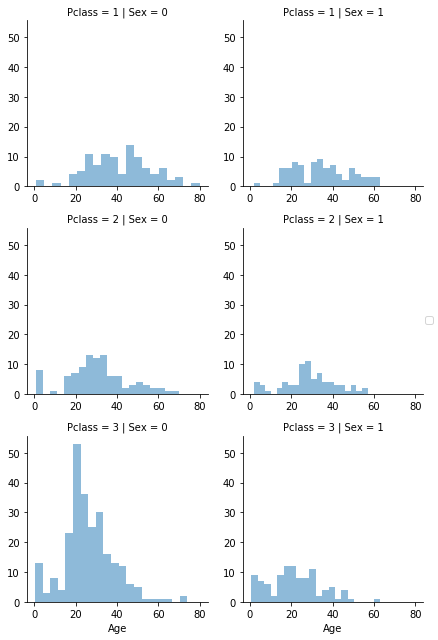

In [0]:
pclass_sex_age_grid = sns.FacetGrid(df_train, row='Pclass', col='Sex')
pclass_sex_age_grid.map(plt.hist, 'Age', alpha=0.5, bins=20)
pclass_sex_age_grid.add_legend()

### Populating null values with predicted data

Checking the number of values in the training data with null values in the Age column

In [0]:
df_train.Age.isnull().sum()

177

Coming up with median age based on passenger class and sex

In [0]:
median_age = np.zeros((2,3))
for dataset in combine:
    for sex in range(0,2):
        for pclass in range(0,3):
            guess_df = dataset[(dataset['Sex'] == sex) & \
                                  (dataset['Pclass'] == pclass+1)]['Age'].dropna()
            age_guess = guess_df.median()
            median_age[sex,pclass] = age_guess
median_age

array([[ 42.,  28.,  24.],
       [ 41.,  24.,  22.]])

Replacing null values of Age with median age for the passenger's class and sex

In [0]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = median_age[i,j]

    dataset['Age'] = dataset['Age'].astype(int)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,4
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,4


Splitting the ages of the training data into 5 parts to split a continuous numerical value (age) into bands (i.e age bands)

In [0]:
df_train['AgeBand'] = pd.cut(df_train['Age'], 5)
df_train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


Encode the age band that we have calculated as AgeG which indicates age group

In [0]:
for dataset in combine:
    dataset.loc[ dataset['Age'] <= 16, 'AgeG'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'AgeG'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'AgeG'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'AgeG'] = 3
    dataset.loc[ dataset['Age'] > 64, 'AgeG'] = 4

df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand,AgeG
0,0,3,0,22,1,0,7.2500,S,4,"(16.0, 32.0]",1.0
1,1,1,1,38,1,0,71.2833,C,3,"(32.0, 48.0]",2.0
2,1,3,1,26,0,0,7.9250,S,2,"(16.0, 32.0]",1.0
3,1,1,1,35,1,0,53.1000,S,3,"(32.0, 48.0]",2.0
4,0,3,0,35,0,0,8.0500,S,4,"(32.0, 48.0]",2.0


One we are done with the making the age feature into the groups we can lose those features

In [0]:
df_train = df_train.drop(['AgeBand','Age'], axis=1)
combine = [df_train, df_test]
df_train.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,AgeG
0,0,3,0,1,0,7.2500,S,4,1.0
1,1,1,1,1,0,71.2833,C,3,2.0
2,1,3,1,0,0,7.9250,S,2,1.0
3,1,1,1,1,0,53.1000,S,3,2.0
4,0,3,0,0,0,8.0500,S,4,2.0


In [0]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

df_train[['FamilySize','Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


Let us drop the SibSp and Parch columns since we have included them into our FamilySize feature

In [0]:
df_train = df_train.drop(['SibSp', 'Parch'], axis=1)
df_test = df_test.drop(['SibSp','Parch'], axis=1)
combine = [df_train, df_test]

df_train.head()

,Survived,Pclass,Sex,Fare,Embarked,Title,AgeG,FamilySize
0,0,3,0,7.2500,S,4,1.0,2
1,1,1,1,71.2833,C,3,2.0,2
2,1,3,1,7.9250,S,2,1.0,1
3,1,1,1,53.1000,S,3,2.0,2
4,0,3,0,8.0500,S,4,2.0,1


### Converting a categorical feature into a numeric feature

In order to convert the 'Embarked' feature into a numeric feature we need to fill in the null values of the column with actual data, so we are finding the most common value in this column by generating the mode of the data. The 

In [0]:
freq_port = df_train.Embarked.dropna().mode()[0]
freq_port

'S'

Replacing the value of the 'Embarked' column in the data with the most common embarked port, is denoted by 'S'

In [0]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

df_train[['Embarked','Survived']].groupby(['Embarked'], as_index = False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


Let us now map each of the 'Embarked' ports into numerical values to convert it into a numeric feature

In [0]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

df_train.head()

,Survived,Pclass,Sex,Fare,Embarked,Title,AgeG,FamilySize
0,0,3,0,7.2500,0,4,1.0,2
1,1,1,1,71.2833,1,3,2.0,2
2,1,3,1,7.9250,0,2,1.0,1
3,1,1,1,53.1000,0,3,2.0,2
4,0,3,0,8.0500,0,4,2.0,1


We are dropping the 'Fare' column because we are assuming that the passenger class column is indicatory of the price of the ticket. This is done to simplify the analysis

In [0]:
df_train = df_train.drop(['Fare'], axis=1)
df_test = df_test.drop(['Fare'], axis=1)
combine = [df_train, df_test]

df_train.head()

,Survived,Pclass,Sex,Embarked,Title,AgeG,FamilySize
0,0,3,0,0,4,1.0,2
1,1,1,1,1,3,2.0,2
2,1,3,1,0,2,1.0,1
3,1,1,1,0,3,2.0,2
4,0,3,0,0,4,2.0,1


Fixing the age group column so all the values are int

In [0]:
for dataset in combine:
    dataset.AgeG = dataset.AgeG.astype(int)
df_train.head()

,Survived,Pclass,Sex,Embarked,Title,AgeG,FamilySize
0,0,3,0,0,4,1,2
1,1,1,1,1,3,2,2
2,1,3,1,0,2,1,1
3,1,1,1,0,3,2,2
4,0,3,0,0,4,2,1


In [0]:
df_test = df_test.drop(['Age'], axis=1)
df_test.head()

,PassengerId,Pclass,Sex,Embarked,Title,AgeG,FamilySize
0,892,3,0,2,4,2,1
1,893,3,1,0,3,2,2
2,894,2,0,2,4,3,1
3,895,3,0,0,4,1,1
4,896,3,1,0,3,1,3


In [0]:
X_train = df_train.drop("Survived", axis=1)
Y_train = df_train['Survived']
X_test = df_test.drop('PassengerId', axis=1).copy()

### Decision Trees

Decision Trees are classifiers which map features as tree branches to finally come to a conclusive value which is denoted by the leaf of the tree. Tree models generally take a finite set of values and these trees are known as classification trees. The branches in the tree represent the decision based branches based on features available and the leaves of the tree represent the values that are derived from the conclusion of decisions made on those features

In [0]:
tree = DecisionTreeClassifier()
tree.fit(X_train, Y_train)
Y_pred = tree.predict(X_test)
acc_tree = round(tree.score(X_train, Y_train)*100, 2)
acc_tree

86.200000000000003

As we can see, the decision tree classifer outputs a 86.2% accuracy on the test set and is the most successful model for the set of features and the model that we have built.

In [0]:
submission = pd.DataFrame({
        "PassengerId": df_test["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('titanic/submission.csv', index=False)